In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Aim is to predict the marks of students of the test data

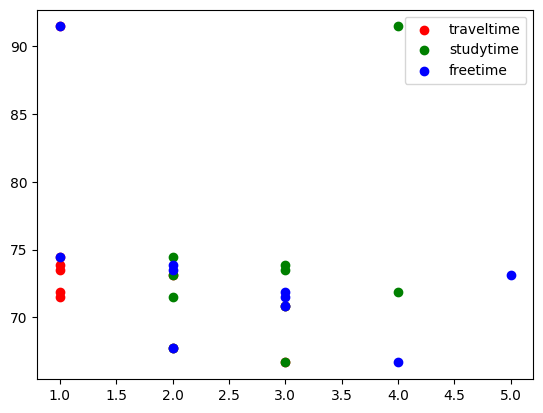

In [2]:
# Use the file namd 'training data' to train the model

data = pd.read_excel('Training data.xlsx')

# adding extra index
data['extra_time'] = data['absences'] * data['traveltime']

# reordering the columns
columns_titles = ['internet', 'sex', 'traveltime', 'studytime', 'freetime',
                  'absences', 'age', 'iq', 'extra_time', 'marks']
data = data.reindex(columns = columns_titles)

x_train = np.array(data.iloc[:, :-1])
y_train = np.array(data.loc[:, ['marks']]).reshape(-1, 1)

# Try plotting y_train with different features
# To get an idea whether to add some features or not
# Add some features if required in x_train

plt.scatter(x_train[:10, 2], y_train[0:10], label = 'traveltime', c = 'r')
plt.scatter(x_train[:10, 3], y_train[0:10], label = 'studytime', c = 'g')
plt.scatter(x_train[:10, 4], y_train[0:10], label = 'freetime', c = 'b')

plt.legend()
plt.show()

# Also do label encoding for features not represented in numbers
# refer the link if not know : https://youtu.be/589nCGeWG1w?si=t2Wa7LgbUOO4RooM

def feature_changing(x_train):
  # ---------
    # Your code here
    for i in range(x_train.shape[0]):
        if(x_train[i][0] == 'yes'):
            x_train[i][0] = 1
        else:
            x_train[i][0] = 0
        if(x_train[i][1] == 'M'):
            x_train[i][1] = 1
        else:
            x_train[i][1] = 0
  # ---------
    return x_train

x_train = feature_changing(x_train)

In [3]:
def z_score(x_train):

  # ---------
    # write the code for feature scaling here
    # Your code here
    x_mean = np.mean(x_train, axis = 0)
    x_std = np.std(x_train, axis = 0, dtype = np.float64)
    x_train = (x_train - x_mean) / x_std
  # ---------

    return x_train,x_std,x_mean

In [4]:
def cost(x_train,y_train,w,b):

  # ---------
    # Use mean square error as cost function
    # return cost
    m = x_train.shape[0]
    y_pred = np.dot(x_train, w) + b
    cost = (y_pred - y_train) ** 2
    loss = np.sum(cost) / (2 * m)
  # ---------

    return loss

In [1]:
def gradient_descent(x_train,y_train,w,b):

  # ---------
    learning_rate = 0.01
    x, y = x_train.shape
    dj_dw = np.zeros((y, 1))
    dj_db = 0.0
    y_pred = np.dot(x_train, w) + b
    for i in range(x):
        cost = y_pred[i] - y_train[i]
        for j in range(y):
            dj_dw[j] += cost * x_train[i, j]
        dj_db += cost                
    dj_dw = dj_dw / x                              
    dj_db = dj_db / x

    w = w - learning_rate * dj_dw
    b = b - learning_rate * dj_db 
  # ---------

    return w,b

In [6]:
x_train = x_train.astype(np.float64)
x_train,x_std,x_mean = z_score(x_train)

np.random.seed(2147483647)
w = np.random.randn(x_train.shape[1],1)
b = np.random.randn(1)

old_cost = 0

while abs(old_cost - cost(x_train,y_train,w,b))>0.00001:
  old_cost = cost(x_train,y_train,w,b)
  w,b = gradient_descent(x_train,y_train,w,b)  

# x_predict = pd.read_excel('Test data.xlsx').iloc[:,:8].to_numpy()
# x_predict = feature_changing(x_predict)
# x_predict = (x_predict - x_mean)/x_std
# ans = pd.read_excel('Test data.xlsx').iloc[:,8].to_numpy()

# some extra adjustment as I added extra feature
data1 = pd.read_excel('Test data.xlsx')
data1['extra_time'] = data1['absences'] * data1['traveltime']
columns_titles = ['internet', 'sex', 'traveltime', 'studytime', 'freetime',
                  'absences', 'age', 'iq', 'extra_time', 'marks']
data1 = data1.reindex(columns = columns_titles)
x_predict = np.array(data1.iloc[:, :-1])

x_predict = feature_changing(x_predict)
x_predict = (x_predict - x_mean)/x_std
ans = np.array(data1.loc[:, ['marks']]).reshape(-1, 1)

y_predict = np.dot(x_predict,w) + b

accuracy = 0
for dim in range(len(ans)):
  if abs(y_predict[dim]-ans[dim])<0.5: # do not change the tolerance as you'll be checked on +- 0.5 error only
    accuracy += 1
accuracy = round(accuracy*100/200.0,2)
ok = 'Congratulations' if accuracy>95 else 'Optimization required'
print(f"{ok}, your accuracy is {accuracy}%")

Congratulations, your accuracy is 100.0%
